## CM1-LOFS supercell visualization

This notebook loads and plots a CM1 simulation with LOFS netcdf output.


This notebook requires the latest code on the master branch of the yt source code, so to run this notebook you'll need to download and install from source (see [here](https://yt-project.org/doc/installing.html#installing-yt-from-source)). 


In [1]:
import yt

In [2]:
ds = yt.load('cm1_tornado_lofs/budget-test.04400.000000.nc')

yt : [INFO     ] 2020-11-19 15:39:59,489 Parameters: current_time              = 4400.0
yt : [INFO     ] 2020-11-19 15:39:59,489 Parameters: domain_dimensions         = [1198 1230  198]
yt : [INFO     ] 2020-11-19 15:39:59,490 Parameters: domain_left_edge          = [-5.98499985e+01 -6.14500008e+01  5.00000007e-02]
yt : [INFO     ] 2020-11-19 15:39:59,490 Parameters: domain_right_edge         = [59.84999847 61.45000076 19.75      ]
yt : [INFO     ] 2020-11-19 15:39:59,490 Parameters: cosmological_simulation   = 0


We can check the fields:

In [3]:
ds.field_list

[('cm1', 'dbz'), ('cm1', 'prespert'), ('cm1', 'thrhopert'), ('cm1', 'zvort')]

and pull out values from regions: 

In [4]:
ad = ds.all_data() 
dbz = ad['dbz']
print(dbz.shape)
print(dbz[0:1000:50])

(291760920,)
[-35.21875  -35.21875  -19.328125 -35.21875  -35.21875  -35.21875
 -19.390625 -35.21875  -35.21875  -35.21875  -19.359375 -35.21875
 -35.21875  -35.21875  -19.296875 -35.21875  -35.21875  -35.21875
 -19.25     -35.21875 ] dB


or find some derived quantities like the min/max values for a field:

In [5]:
ad.quantities.extrema('dbz')

unyt_array([-55.81005859,  68.84814453], 'dB')

In [6]:
ad.quantities.extrema('zvort')

unyt_array([-0.4729321 ,  0.55976564], '1/s')

## Slice Plots 

Let's move on to some plotting. First let's slice the reflectivity at constant `z`:

yt : [INFO     ] 2020-11-19 15:40:12,241 xlim = -59.849998 59.849998
yt : [INFO     ] 2020-11-19 15:40:12,242 ylim = -61.450001 61.450001
yt : [INFO     ] 2020-11-19 15:40:12,242 xlim = -59.849998 59.849998
yt : [INFO     ] 2020-11-19 15:40:12,243 ylim = -61.450001 61.450001
yt : [INFO     ] 2020-11-19 15:40:12,244 Making a fixed resolution buffer of (('cm1', 'dbz')) 800 by 800
yt : [WARNING  ] 2020-11-19 15:40:12,858 Plot image for field ('cm1', 'dbz') has both positive and negative values. Min = -36.948635, Max = 58.531833.
yt : [WARNING  ] 2020-11-19 15:40:12,859 Switching to symlog colorbar scaling unless linear scaling is specified later



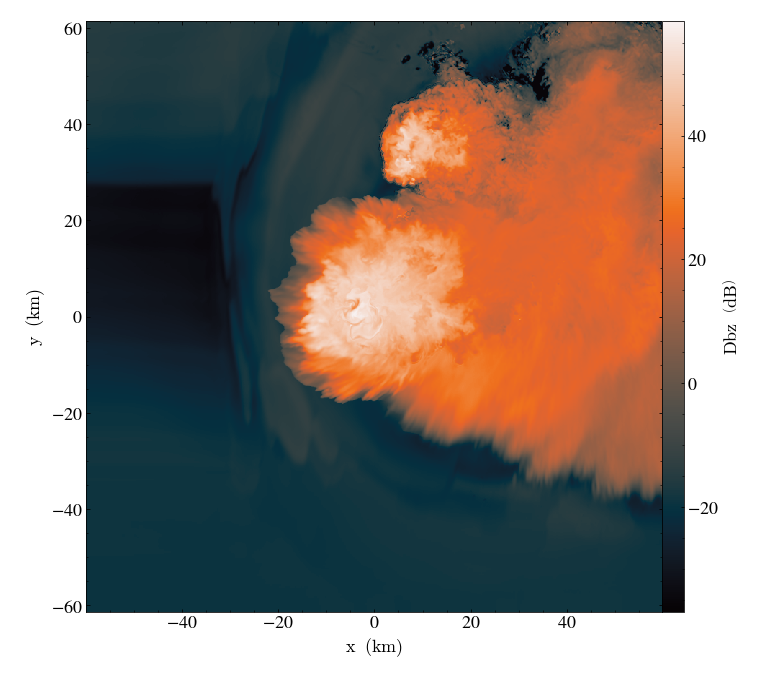

In [7]:
slc = yt.SlicePlot(ds,'z','dbz')
slc.set_log('dbz',False)
slc.set_cmap('dbz', 'dusk')

which we can save with 

In [8]:
slc.save('./figures/cm1_slice_dbz_fixedz.png')

yt : [INFO     ] 2020-11-19 15:40:13,419 Saving plot ./figures/cm1_slice_dbz_fixedz.png


['./figures/cm1_slice_dbz_fixedz.png']

and now a cross-section:

yt : [INFO     ] 2020-11-19 15:40:14,541 xlim = -61.450001 61.450001
yt : [INFO     ] 2020-11-19 15:40:14,542 ylim = 0.050000 19.750000
yt : [INFO     ] 2020-11-19 15:40:14,542 xlim = -61.450001 61.450001
yt : [INFO     ] 2020-11-19 15:40:14,543 ylim = 0.050000 19.750000
yt : [INFO     ] 2020-11-19 15:40:14,544 Making a fixed resolution buffer of (('cm1', 'dbz')) 800 by 800
yt : [WARNING  ] 2020-11-19 15:40:15,019 Plot image for field ('cm1', 'dbz') has both positive and negative values. Min = -37.452676, Max = 64.368267.
yt : [WARNING  ] 2020-11-19 15:40:15,020 Switching to symlog colorbar scaling unless linear scaling is specified later



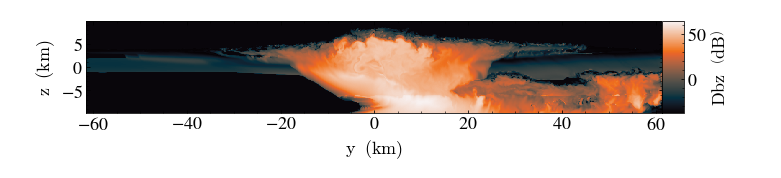

In [9]:
slc = yt.SlicePlot(ds,'x','dbz')
slc.set_log('dbz',False)
slc.set_cmap('dbz', 'dusk')

In [10]:
slc.save('./figures/cm1_slice_dbz_full.png')

yt : [INFO     ] 2020-11-19 15:40:15,328 Saving plot ./figures/cm1_slice_dbz_full.png


['./figures/cm1_slice_dbz_full.png']

let's create a slice with a smaller width to pull out some of that detail:

yt : [INFO     ] 2020-11-19 15:40:16,100 xlim = -12.500000 12.500000
yt : [INFO     ] 2020-11-19 15:40:16,100 ylim = -2.600000 22.400000
yt : [INFO     ] 2020-11-19 15:40:16,101 xlim = -12.500000 12.500000
yt : [INFO     ] 2020-11-19 15:40:16,101 ylim = -2.600000 22.400000
yt : [INFO     ] 2020-11-19 15:40:16,102 Making a fixed resolution buffer of (('cm1', 'dbz')) 800 by 800
yt : [WARNING  ] 2020-11-19 15:40:16,567 Plot image for field ('cm1', 'dbz') has both positive and negative values. Min = -37.188965, Max = 64.375000.
yt : [WARNING  ] 2020-11-19 15:40:16,567 Switching to symlog colorbar scaling unless linear scaling is specified later



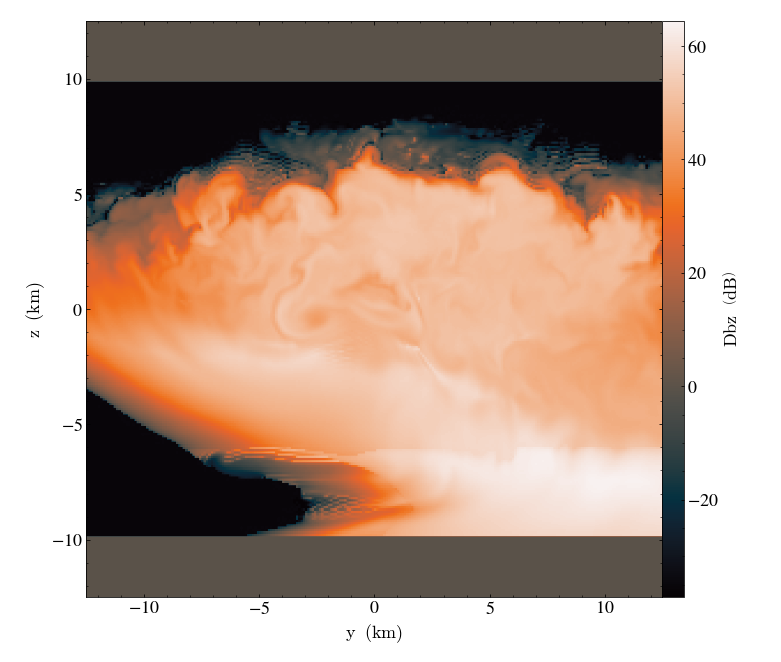

In [11]:
slc = yt.SlicePlot(ds,'x','dbz',width = (25,'km'))
slc.set_log('dbz',False)
slc.set_cmap('dbz', 'dusk')

In [12]:
slc.save('./figures/cm1_slice_dbz_50km.png')

yt : [INFO     ] 2020-11-19 15:40:17,007 Saving plot ./figures/cm1_slice_dbz_50km.png


['./figures/cm1_slice_dbz_50km.png']

and zoom in a couple of times:

yt : [INFO     ] 2020-11-19 15:40:17,151 Making a fixed resolution buffer of (('cm1', 'dbz')) 800 by 800



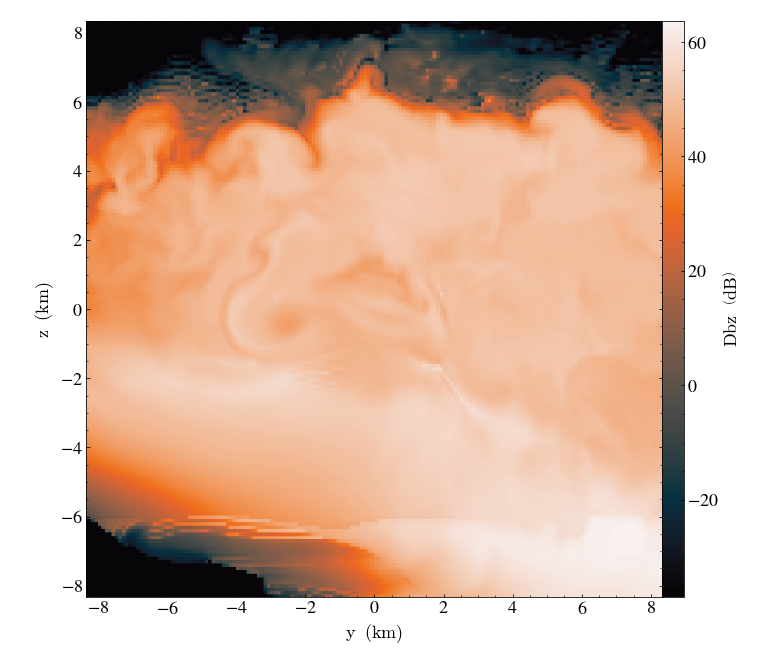


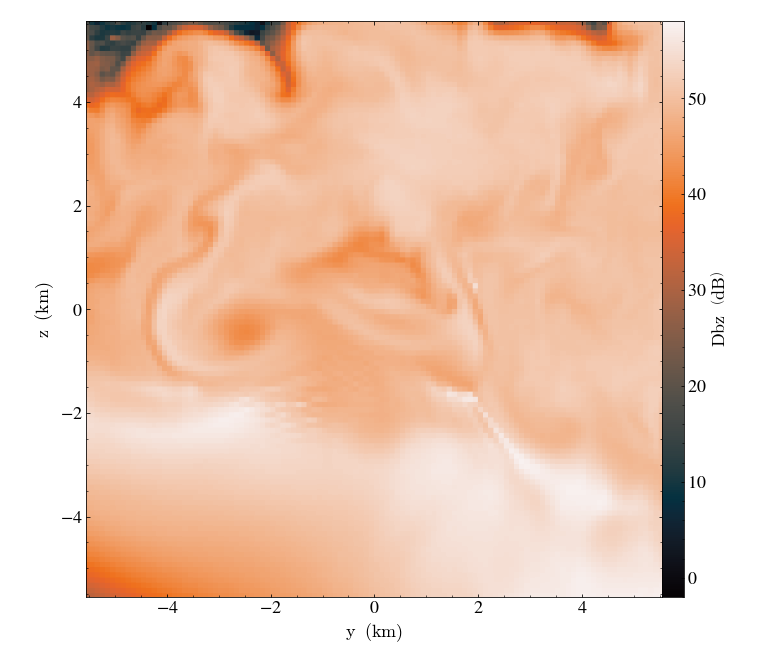

In [13]:
for i in range(2):
    slc.zoom(1.5)
    slc.show()

## Phase Plots

[Phase plots](https://yt-project.org/doc/visualizing/plots.html#d-phase-plots) are useful for investigating statistical tradeoffs betweeen parameters. In the following, we define a spherical region centered on the domain center with a radius of 3 km and then create a phase plot showing the thermal perturbation vs vertical voricity, colored by pressure-perturbation: 

yt : [WARNING  ] 2020-11-19 15:40:22,426 Profiled field ('cm1', 'prespert') has no positive values.  Max = 0.000000.
yt : [WARNING  ] 2020-11-19 15:40:22,427 Switching to linear colorbar scaling.



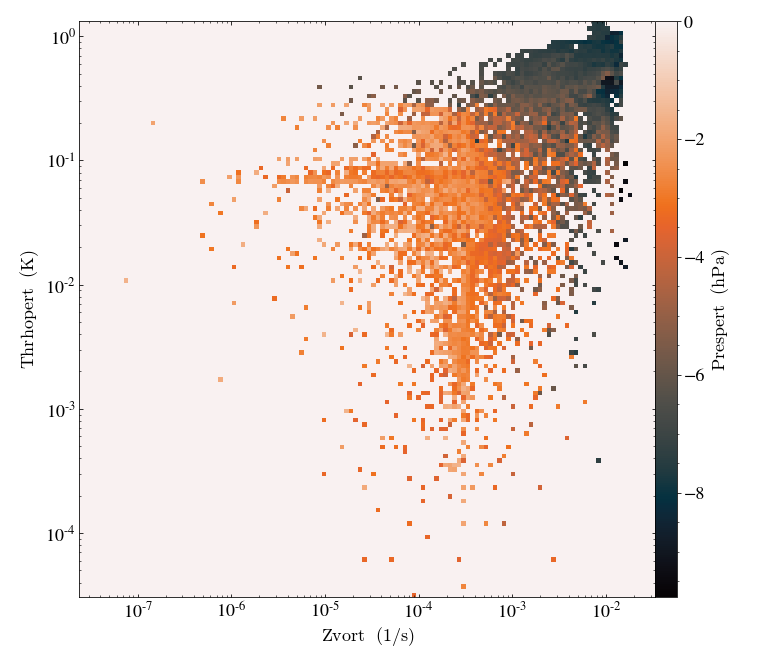

In [14]:
sp = ds.sphere([0, 0, 0], (3, "km"))

pplot = yt.PhasePlot(sp, "zvort", "thrhopert", ["prespert"], weight_field="prespert", )
pplot.set_log('prespert',False)
pplot.set_cmap('prespert', 'dusk')
pplot.show()

In [15]:
pplot.save('./figures/cm1_phase_plot.png')

yt : [INFO     ] 2020-11-19 15:40:23,000 Saving plot ./figures/cm1_phase_plot.png


['./figures/cm1_phase_plot.png']